# Pandas Cook Book Chapter 05 and 06

See the [Cookbook](http://github.com/jvns/pandas-cookbook) here, let's start learning chapter 5.

In [4]:
# render plot inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Here we are going to use Canada's weather data for 2012.

In [5]:
weather2012 = pd.read_csv('data/weather_2012.csv', parse_dates=['Date/Time'], index_col='Date/Time')
weather2012[80:90]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-04 08:00:00,-17.8,-24.2,57,17,24.1,101.73,Mostly Cloudy
2012-01-04 09:00:00,-16.8,-22.5,61,9,24.1,101.68,Mostly Cloudy
2012-01-04 10:00:00,-15.2,-20.6,63,7,24.1,101.54,Mostly Cloudy
2012-01-04 11:00:00,-14.2,-21.1,56,13,24.1,101.41,Mostly Cloudy
2012-01-04 12:00:00,-13.7,-21.7,51,11,24.1,101.25,Snow
2012-01-04 13:00:00,-12.4,-20.1,53,11,24.1,101.07,Cloudy
2012-01-04 14:00:00,-11.3,-19.0,53,7,19.3,100.97,Snow
2012-01-04 15:00:00,-10.2,-16.3,61,11,9.7,100.89,Snow
2012-01-04 16:00:00,-9.4,-15.5,61,13,19.3,100.79,Snow


## String operations
Say we want to find those rows indicate there is a snow. We can achieve this by using pandas string operations.

In [6]:
weatherDescriptions = weather2012['Weather']
isSnowing = weatherDescriptions.str.contains('Snow')
isSnowing[80:90] # consistent with the weather above

Date/Time
2012-01-04 08:00:00    False
2012-01-04 09:00:00    False
2012-01-04 10:00:00    False
2012-01-04 11:00:00    False
2012-01-04 12:00:00     True
2012-01-04 13:00:00    False
2012-01-04 14:00:00     True
2012-01-04 15:00:00     True
2012-01-04 16:00:00     True
2012-01-04 17:00:00     True
Name: Weather, dtype: bool

It's more useful to plot it. Note that we cannot plot boolean values directly, so we map them to 0/1 first.

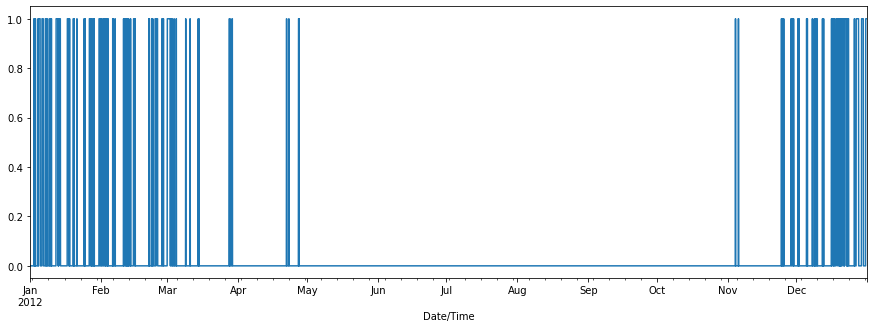

In [7]:
isSnowing.apply(lambda x: 1 if x else 0).plot(figsize=(15,5))

## Get monthly median temperature
We can use pandas resample() function to achive this. It involves three steps:

1. Take out temperature data; 
2. Resample on monthly basis;
3. Apply median function to each group;

Make sure the index is of type pandas datetime or pandas timedelta, so that resample() function can use that to group rows together. In the below example, resample('M') means grouping data on monthly basis.

In [8]:
monthlyMedian = weather2012['Temp (C)'].resample('M').apply(np.median)
monthlyMedian

Date/Time
2012-01-31    -7.05
2012-02-29    -4.10
2012-03-31     2.60
2012-04-30     6.30
2012-05-31    16.05
2012-06-30    19.60
2012-07-31    22.90
2012-08-31    22.20
2012-09-30    16.10
2012-10-31    11.30
2012-11-30     1.05
2012-12-31    -2.85
Freq: M, Name: Temp (C), dtype: float64

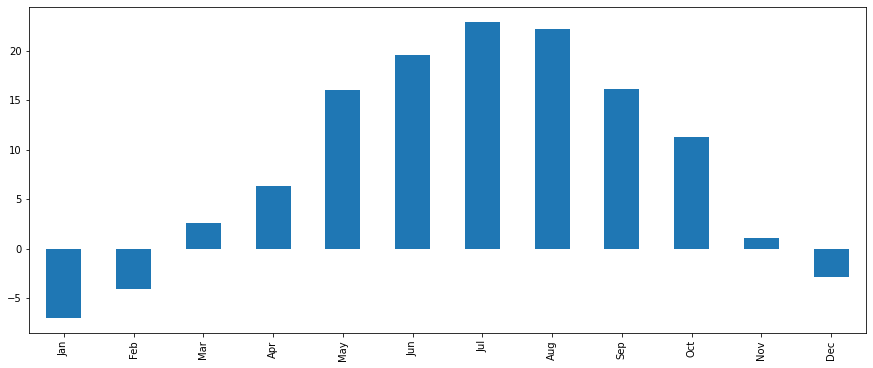

In [15]:
monthlyMedian.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthlyMedian.plot(kind='bar', figsize=(15,6))

## Get monthly snowiness
If we want to measure how often snow occurs per month, we can do it by counting the % of hours it's snowing per month. Here is how.

In [16]:
snowiness = isSnowing.apply(lambda x: 1 if x else 0).resample('M').apply(np.mean)
snowiness.head()

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
Freq: M, Name: Weather, dtype: float64

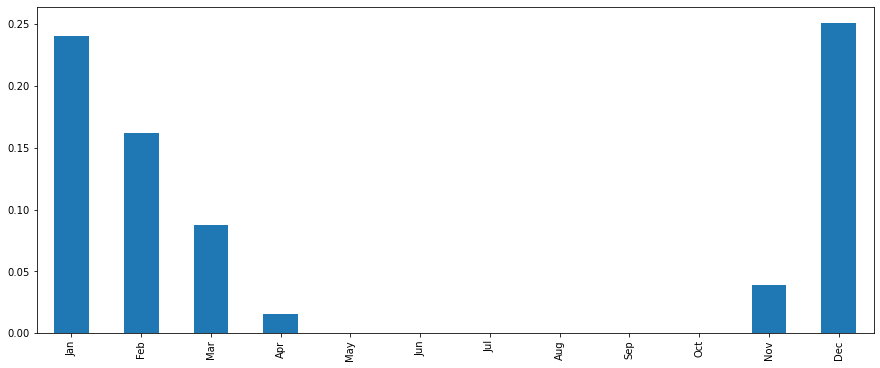

In [17]:
snowiness.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
snowiness.plot(kind='bar', figsize=(15,6))

## Plot temperature and snowiness together
To do this, we need to:

1. Combine these two sets of data into one DataFrame;
2. Plot them.

In [21]:
stats = pd.concat([monthlyMedian, snowiness], axis=1) # they have the same index, make sure axis=1, combine as 2 columns
stats

,Temp (C),Weather
Jan,-7.05,0.240591
Feb,-4.10,0.162356
Mar,2.60,0.087366
Apr,6.30,0.015278
May,16.05,0.000000
Jun,19.60,0.000000
Jul,22.90,0.000000
Aug,22.20,0.000000
Sep,16.10,0.000000
Oct,11.30,0.000000


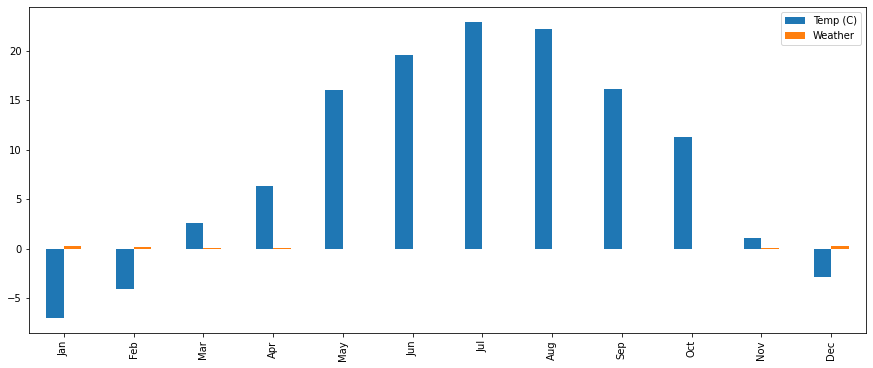

In [22]:
stats.plot(kind='bar', figsize=(15,6)) # works, but two sets of data not of the same scale

The above works, but it has two things to improve:

1. The two sets of data are not of the same scale, putting in the same graph is not a good idea;
2. The title of "weather" better be changed to "snowiness".

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12493E98>,
      dtype=object)

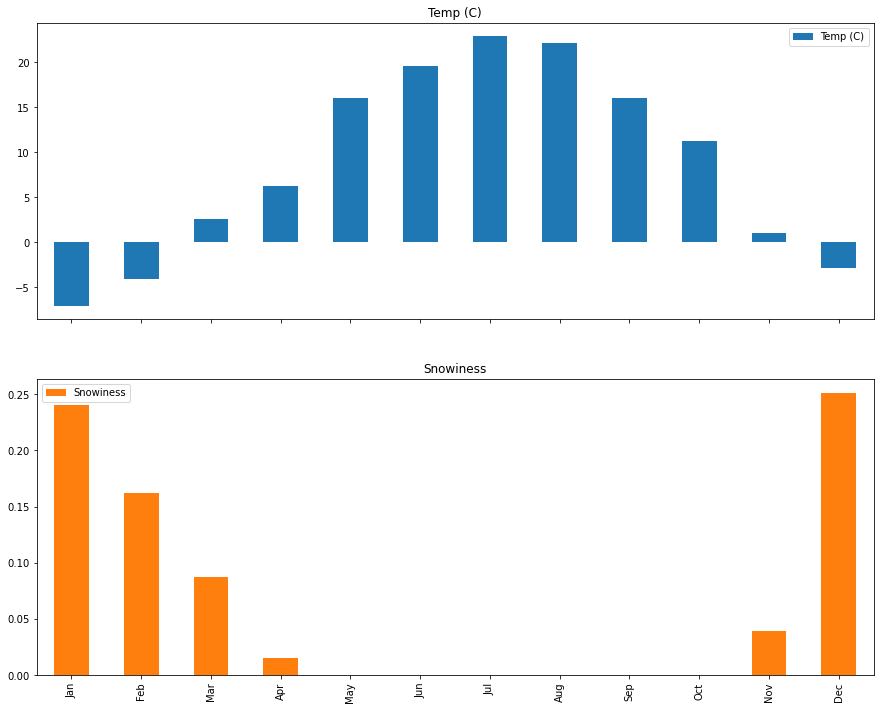

In [29]:
stats.rename(columns={'Weather': 'Snowiness'}, inplace=True)
stats.plot(kind='bar', subplots=True, figsize=(15,12))